<a href="https://colab.research.google.com/github/kiet1043/AI-homeworks/blob/main/Driver_Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [7]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Data_AI/drowsy_train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 2561 images belonging to 2 classes.


In [8]:
training.class_indices

{'TrainBuonNgu': 0, 'TrainTinhTao': 1}

In [9]:
#Convolutional
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(2,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
train=model.fit(training,epochs=30,batch_size=256,verbose=1)

Epoch 1/30
81/81 [==============================] - 151s 2s/step - loss: 0.1905 - accuracy: 0.9344
Epoch 2/30
81/81 [==============================] - 24s 295ms/step - loss: 0.0433 - accuracy: 0.9848
Epoch 3/30
81/81 [==============================] - 24s 291ms/step - loss: 0.0319 - accuracy: 0.9906
Epoch 4/30
81/81 [==============================] - 24s 300ms/step - loss: 0.0176 - accuracy: 0.9949
Epoch 5/30
81/81 [==============================] - 24s 297ms/step - loss: 0.0075 - accuracy: 0.9977
Epoch 6/30
81/81 [==============================] - 24s 295ms/step - loss: 0.0091 - accuracy: 0.9969
Epoch 7/30
81/81 [==============================] - 23s 288ms/step - loss: 0.0076 - accuracy: 0.9977
Epoch 8/30
81/81 [==============================] - 24s 297ms/step - loss: 0.0057 - accuracy: 0.9984
Epoch 9/30
81/81 [==============================] - 24s 294ms/step - loss: 0.0069 - accuracy: 0.9984
Epoch 10/30
81/81 [==============================] - 23s 281ms/step - loss: 0.0033 - accuracy

In [11]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0007036030874587595
Train Accuracy 0.9992190599441528


In [12]:
# Lưu 
model.save("/content/drive/MyDrive/Data_AI/model.h5")

In [13]:
model=load_model('/content/drive/MyDrive/Data_AI/model.h5')

1/1 [==============================] - 0s 114ms/step
BuonNgu


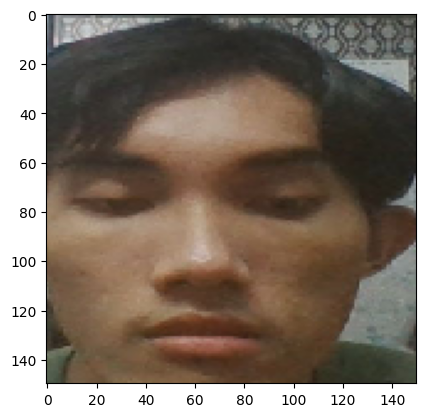

1/1 [==============================] - 0s 27ms/step
BuonNgu


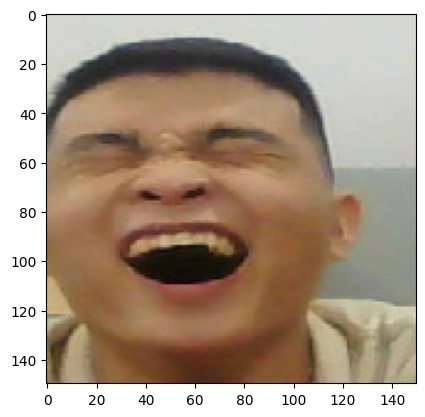

1/1 [==============================] - 0s 25ms/step
BuonNgu


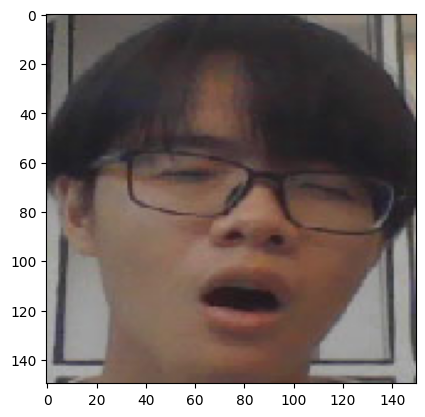

1/1 [==============================] - 0s 30ms/step
TinhTao


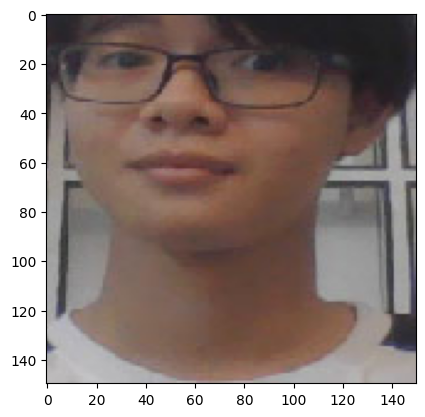

1/1 [==============================] - 0s 24ms/step
TinhTao


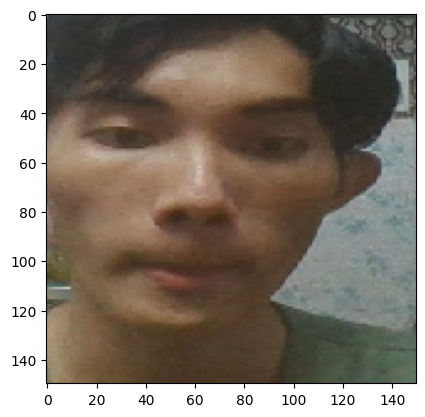

1/1 [==============================] - 0s 27ms/step
BuonNgu


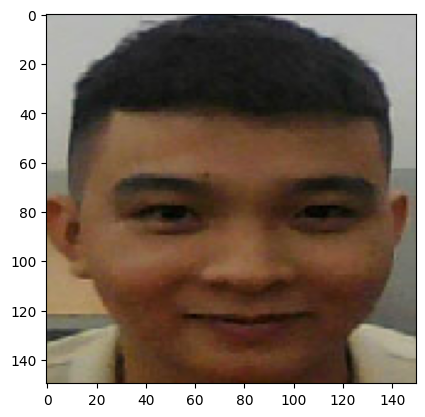

1/1 [==============================] - 0s 24ms/step
TinhTao


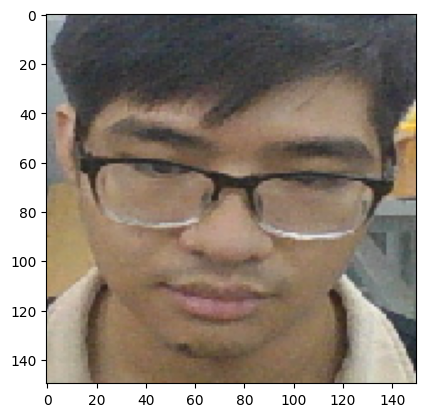

1/1 [==============================] - 0s 22ms/step
BuonNgu


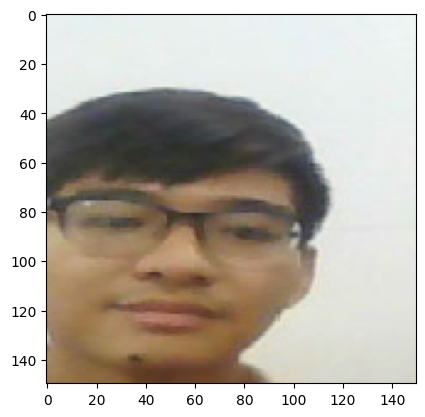

In [14]:
folder="/content/drive/MyDrive/Data_AI/drowsy_test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model.predict(img).argmax())
  class_name=['BuonNgu','TinhTao']
  print(class_name[result])
  plt.show()

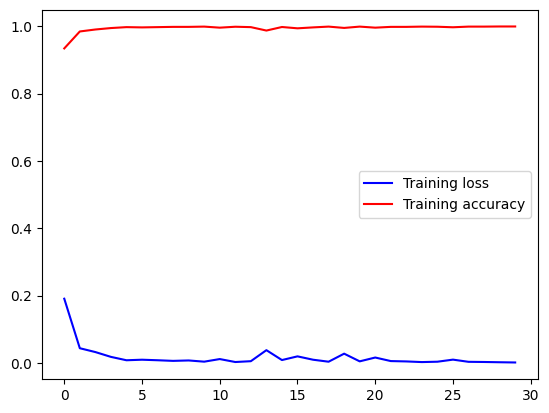

In [15]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.legend(['Training loss','Training accuracy'])
plt.show()     